
**import important libraries**



In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [518]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [519]:
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews_1.csv")

**Explore The Data :**

In [520]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [521]:
df["Liked"].describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [522]:
df.shape

(1000, 2)

In [523]:
df["Liked"].value_counts()

,count
Liked,
1,500
0,500


<Axes: xlabel='Liked', ylabel='count'>

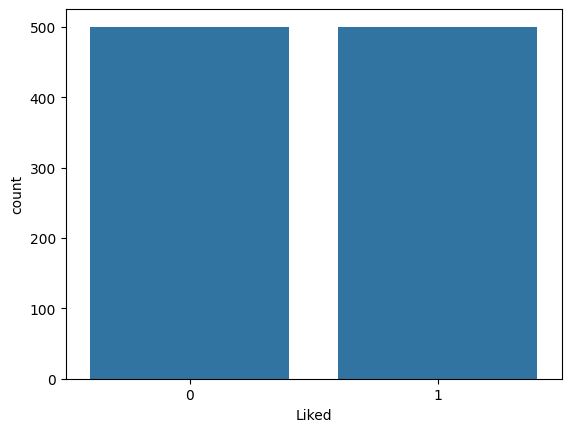

In [524]:
sns.countplot(x=df["Liked"])


In [525]:
print(df.columns)


Index([' Review', 'Liked'], dtype='object')


In [526]:
df[' Review'].apply(len).max()

149

In [527]:
df["Review letter count"]=df[' Review'].apply(len)
df

,Review,Liked,Review letter count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [528]:
df["Review letter count"].idxmax()

985

### **Pre-Processing Data**

In [529]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [530]:
#install library stopwords:
import nltk

from nltk.stem.snowball import stopwords
from nltk.corpus import stopwords

In [531]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [532]:
stop_words = set(stopwords.words('english'))
print (stop_words)

{'out', 'both', 'same', 'not', "i'd", 'other', 'because', 'its', 'down', 'own', 'your', 's', "he'd", 'their', 'ours', 'as', 'i', "mustn't", "they've", 'an', "you'd", 'll', 'yours', 'is', 'above', 'wouldn', 'her', 'on', "we're", 'me', 'at', 'weren', "couldn't", 'now', "we'll", "it'll", "it's", 'that', 'wasn', "you're", "she'll", 'hers', "she'd", 'than', 'needn', 'him', "mightn't", 'haven', 'do', 'o', 'below', "should've", 'and', 'the', 'been', 'them', "they'd", 'only', 'most', "wasn't", 'ma', "we've", 'for', "didn't", "i'll", 'up', "isn't", 'm', 'until', 'should', 've', 'these', 'we', 'further', 'few', 'hadn', 'mustn', 'some', 'doing', 'with', 'did', 'has', 'those', 'which', "haven't", 'whom', 'ain', 'just', 'shouldn', 'such', 'over', 'if', 'so', 'd', "they're", 'our', "hadn't", 'his', 'why', 'had', 'were', 'she', "he'll", "wouldn't", "i've", 'being', "aren't", 't', 'all', 'against', 'any', 'when', 'didn', 'what', 'ourselves', 'theirs', "don't", "you'll", 'this', "shouldn't", 'then', 'a

In [533]:
s = df[' Review'][0]
s

'Wow... Loved this place.'

In [534]:
#1 Remove contractions
!pip install contractions


In [535]:
import contractions
s = contractions.fix(s)

print(s)


Wow... Loved this place.


In [536]:
 #2 Remove Punctuation

import re
s = re.sub('[^a-zA-Z]', " ", s)
s

'Wow    Loved this place '

In [537]:
#3 Convert the whole Statment to lowercase: befoer removing stopwords:
s=s.lower()
s

'wow    loved this place '

In [538]:

#4 convert statment to Tokenization (list of single word ) befoer removing stopwords
s= s.split()
s

['wow', 'loved', 'this', 'place']

In [539]:
#5 Negation words that we want to keep
negation_words = {'not', 'no', 'never', 'nor', 'neither', 'against', 'but', 'don', "don't", 'wasn', "wasn't", 'couldn', "couldn't"}

custom_stop_words = stop_words - negation_words
print(custom_stop_words)

{'out', 'both', 'same', "i'd", 'other', 'because', 'its', 'down', 'own', 'your', 's', "he'd", 'their', 'ours', 'as', 'i', "mustn't", "they've", 'an', "you'd", 'll', 'yours', 'is', 'above', 'wouldn', 'her', 'on', "we're", 'me', 'at', 'weren', 'now', "we'll", "it'll", "it's", 'that', "you're", "she'll", 'hers', "she'd", 'than', 'needn', 'him', "mightn't", 'haven', 'do', 'o', 'below', "should've", 'and', 'the', 'been', 'them', "they'd", 'only', 'most', 'ma', "we've", 'for', "didn't", "i'll", 'up', "isn't", 'm', 'until', 'should', 've', 'these', 'we', 'further', 'few', 'hadn', 'mustn', 'some', 'doing', 'with', 'did', 'has', 'those', 'which', "haven't", 'whom', 'ain', 'just', 'shouldn', 'such', 'over', 'if', 'so', 'd', "they're", 'our', "hadn't", 'his', 'why', 'had', 'were', 'she', "he'll", "wouldn't", "i've", 'being', "aren't", 't', 'all', 'any', 'when', 'didn', 'what', 'ourselves', 'theirs', "you'll", 'this', "shouldn't", 'then', 'about', "hasn't", 'more', 'of', 'does', 'themselves', 'fro

In [540]:
 #6 Remove the stop_words:

temp = []
for word in s:
    if word not in custom_stop_words:
        temp.append(word)
temp


['wow', 'loved', 'place']

In [541]:
#7 convert to string:
s = ' '.join(temp)
s

'wow loved place'

In [542]:
#8 Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
s = [lemmatizer.lemmatize(word, pos='v') for word in temp]
print(s)


['wow', 'love', 'place']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [543]:
print(s)

['wow', 'love', 'place']


In [544]:
#9 convert to Vectorization
from sklearn.feature_extraction.text import CountVectorizer


In [545]:
cv = CountVectorizer()

In [546]:
cv.fit_transform(s).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [547]:
# all data
def preprocess_text(s):


    s = contractions.fix(s)


    s = re.sub('[^a-zA-Z]', " ", s)


    s = s.lower()


    words = s.split()


    temp = []
    for word in words:
        if word not in custom_stop_words:
            temp.append(word)


    lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in temp]


    return " ".join(lemmatized)

In [548]:
# see Outbut :
df[' Review'] = df[' Review'].apply(preprocess_text)
df[' Review'].head(11)


,Review
0,wow love place
1,crust not good
2,not tasty texture nasty
3,stop late may bank holiday rick steve recommen...
4,selection menu great price
5,get angry want damn pho
6,honeslty not taste fresh
7,potatoes like rubber could tell make ahead tim...
8,fry great
9,great touch


In [549]:
# Vertorization  in all data :

cv = CountVectorizer()
cv.fit_transform(df[' Review']).toarray().shape


(1000, 1645)

**Split data train & test**

In [550]:
x=cv.fit_transform(df[' Review']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [551]:
y=df['Liked']
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [552]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.2, random_state=49)




In [553]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

800 200 800 200


In [554]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [555]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Model Training & Building**

In [556]:
from sklearn.naive_bayes import MultinomialNB

In [557]:
clf=MultinomialNB()

In [558]:
clf.fit(x_train, y_train)

MultinomialNB()

**Model Prediction:**

In [559]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1])

In [560]:
y_test.values

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1])

In [561]:
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report

In [562]:
print(confusion_matrix(y_test,y_pred))

[[89 17]
 [22 72]]


In [563]:
print(accuracy_score(y_test,y_pred))

0.805


In [564]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       106
           1       0.81      0.77      0.79        94

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

